In [1]:
%matplotlib inline

In [3]:
from imblearn.over_sampling import SMOTE
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
print('The scikit-learn version is {}.'.format(sklearn.__version__))

macOS-10.15.5-x86_64-i386-64bit
Python 3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 17:21:09) 
[Clang 9.0.1 ]
NumPy 1.18.5
SciPy 1.4.1
Scikit-Learn 0.23.1
The scikit-learn version is 0.23.1.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from dateutil import parser


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


print('Library Loaded')

Library Loaded


In [8]:
#  Heart Disease in Patients from Cleveland.
# https://www.mldata.io/dataset-details/heart_disease/
# 1=male; 0=female
# predicted attribute; 0=HEART DISEASE; 1=NO HEART DISEASE
# data = 'heart.csv'
data = 'heart2.csv'

In [9]:
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.shape

(303, 14)

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
cols = df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
print('# rows in dataset {0}'.format(len(df)))
print('===============================')

for col in cols:
    print('# rows in {1} with ZERO value: {0}'.format(len(df.loc[df[col]== 0]), col))

# rows in dataset 303
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 96
# rows in cp with ZERO value: 143
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 258
# rows in restecg with ZERO value: 147
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 204
# rows in oldpeak with ZERO value: 99
# rows in slope with ZERO value: 21
# rows in ca with ZERO value: 175
# rows in thal with ZERO value: 2
# rows in target with ZERO value: 138


In [14]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
# df = df.rename(columns={"num": "target"})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


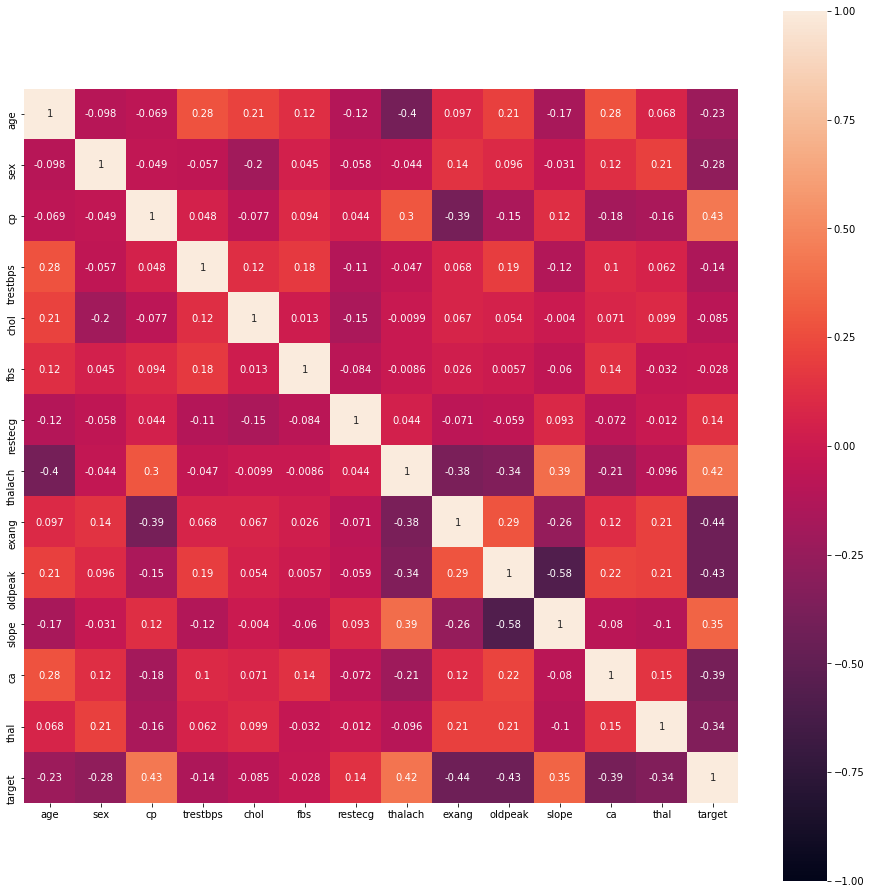

In [16]:
# Visualization

corrmat = df.corr()
fig = plt.figure(figsize = (16, 16))

sns.heatmap(corrmat, vmax = 1, square = True, annot = True, vmin= -1)
plt.show()


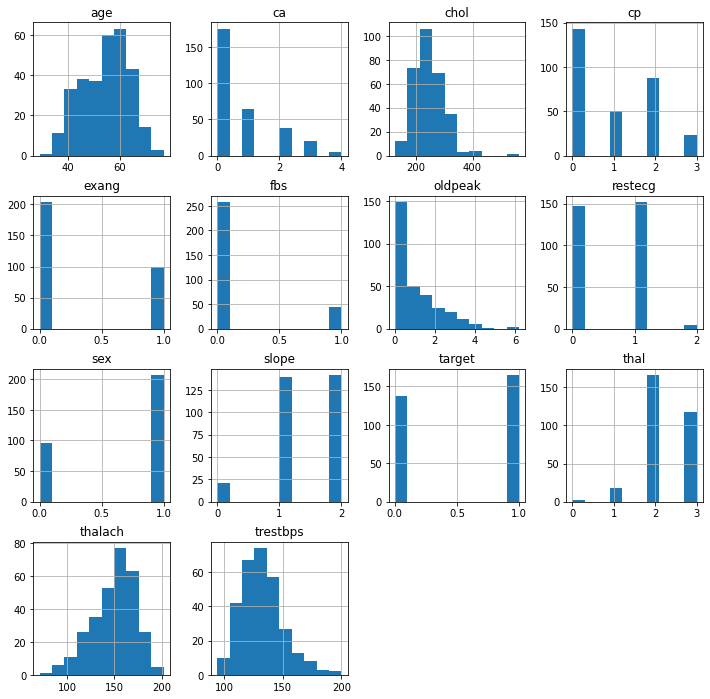

In [17]:
df.hist(figsize = (12, 12))
plt.show()

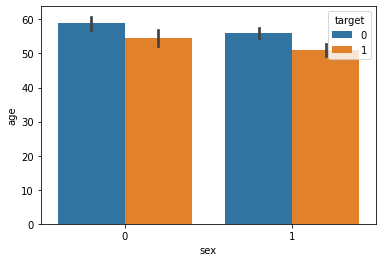

In [18]:
sns.barplot(x='sex', y='age', hue='target', data=df)

/Users/Lina/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarn

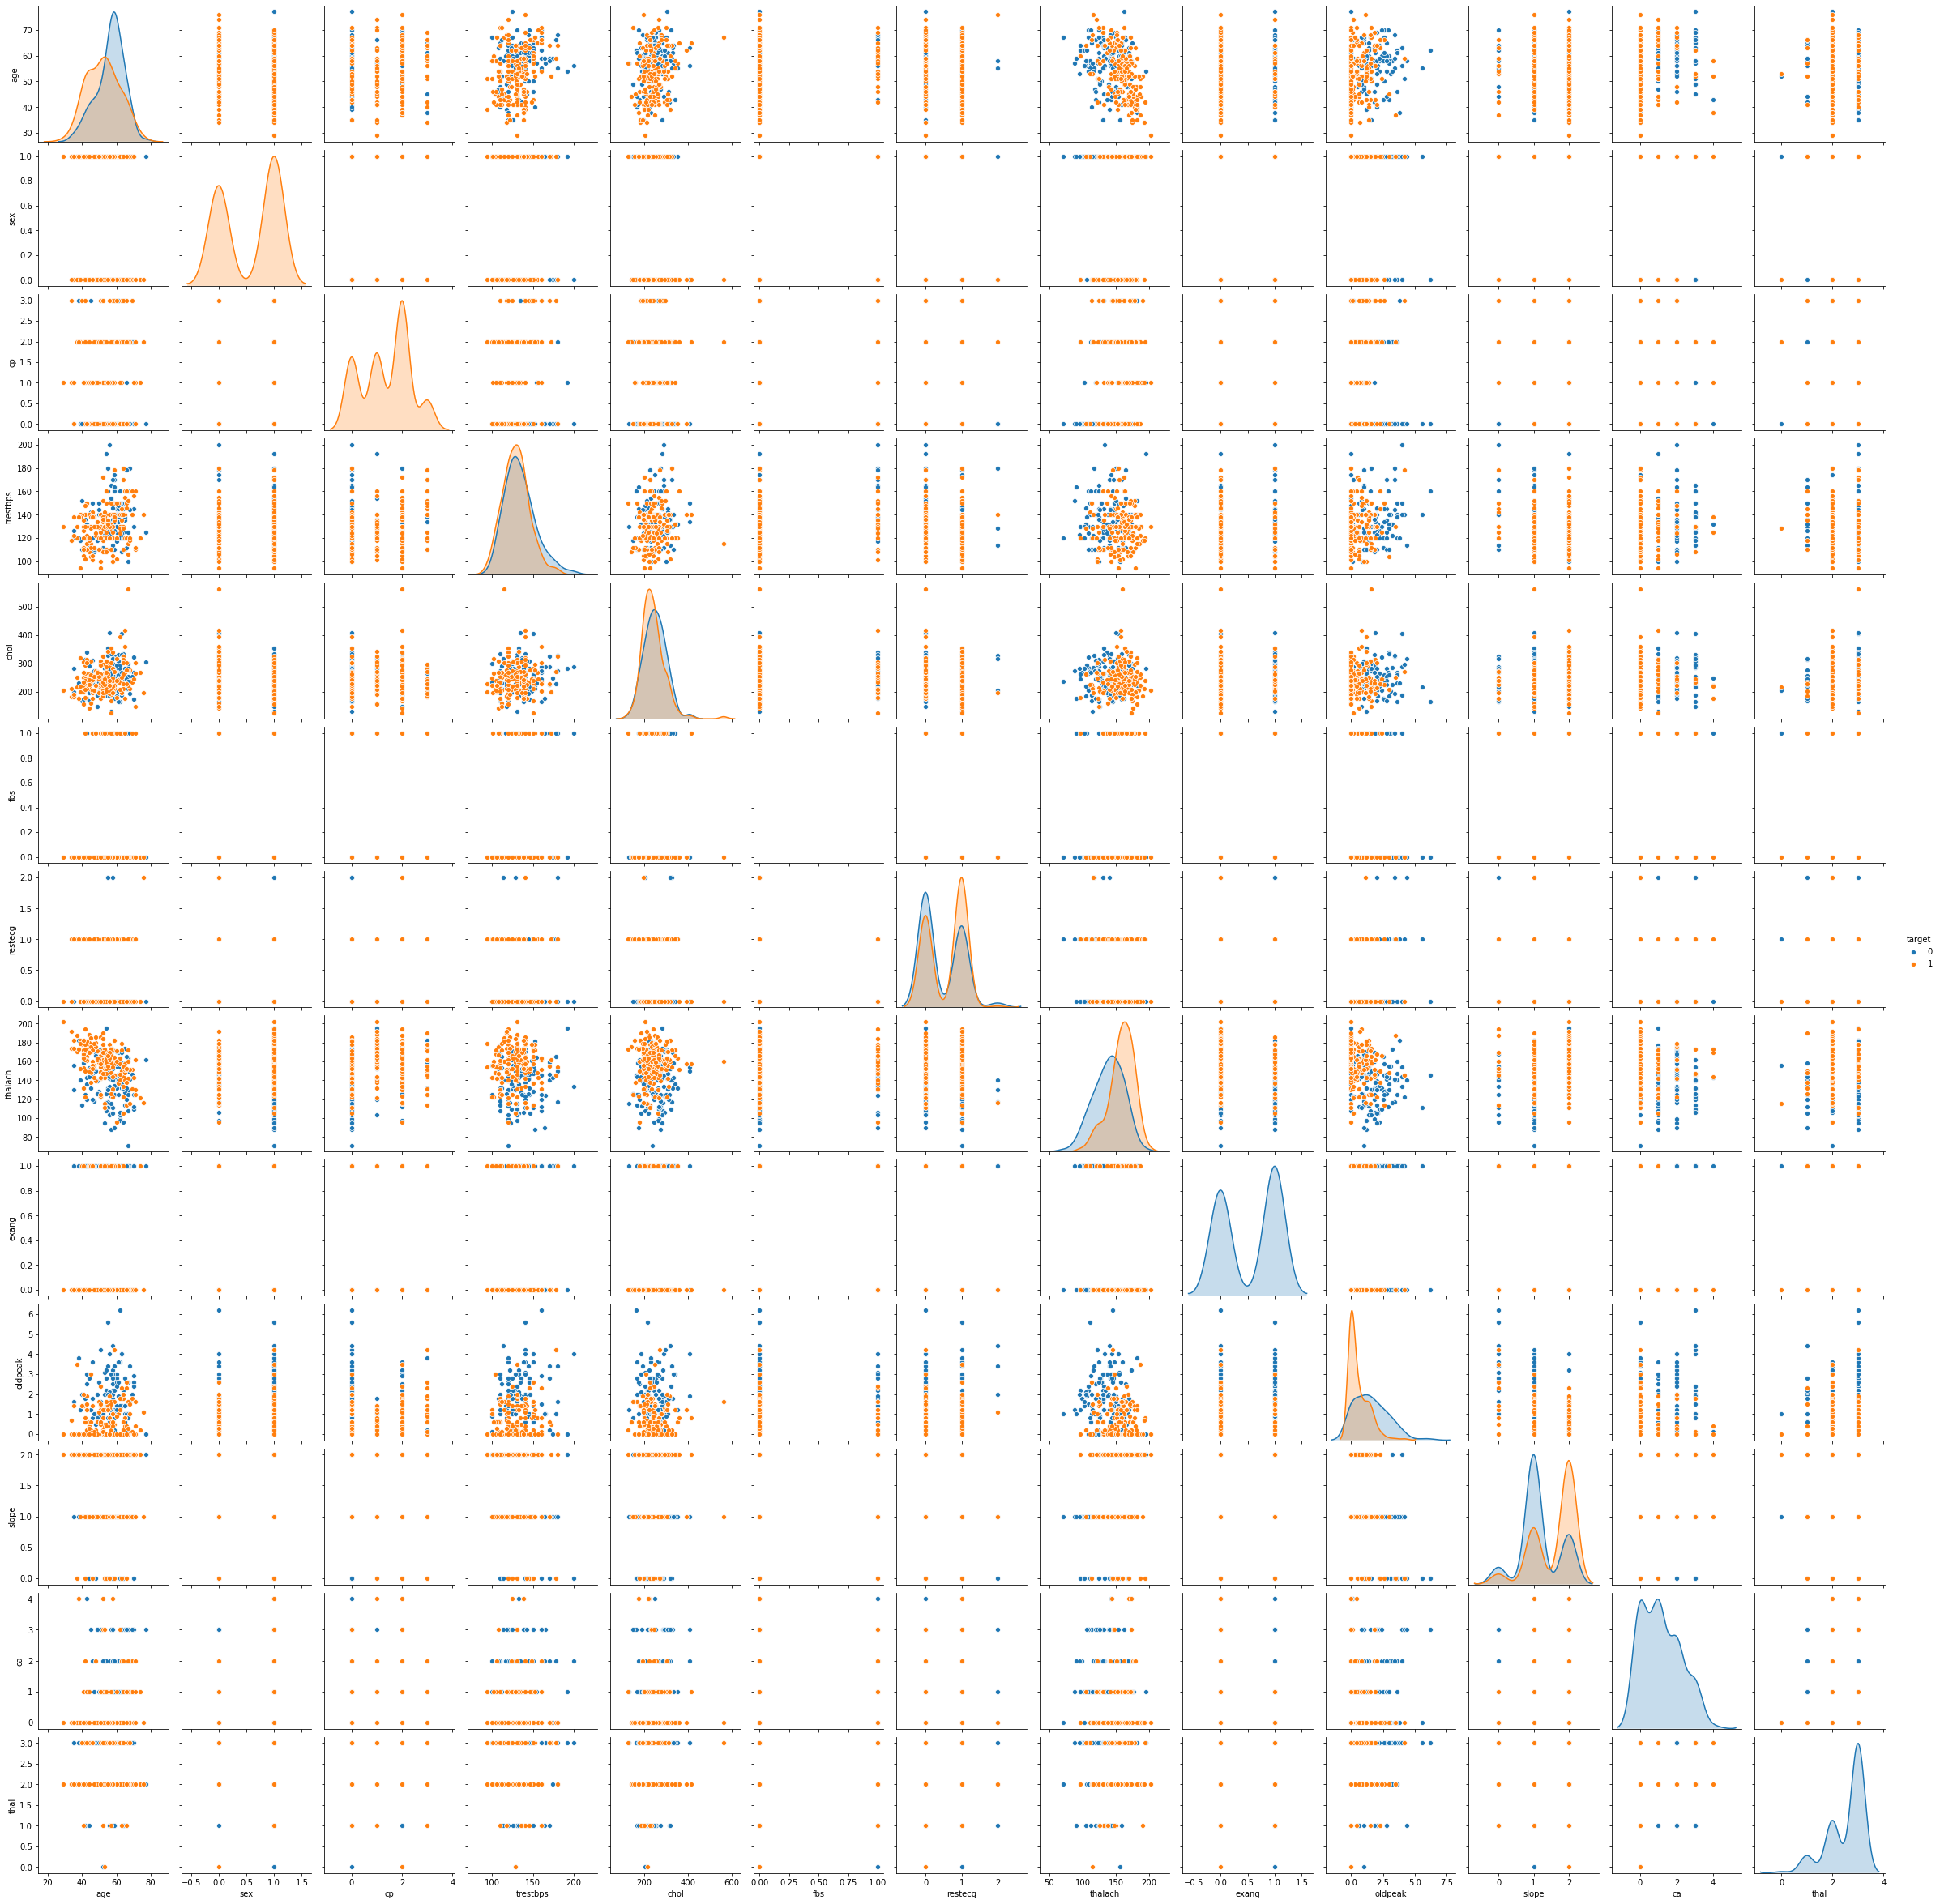

In [19]:
sns.pairplot(df, hue='target',)




In [20]:
X = df.drop('target', axis = 1)
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(time_start)

df_tsne = TSNE(random_state=10).fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

1593049379.865246
t-SNE done! Time elapsed: 3.700809955596924 seconds


In [21]:
df_tsne

array([[  5.955326  ,  -2.5626605 ],
       [ -3.0133836 ,   3.2571511 ],
       [ 10.116308  ,   8.89722   ],
       [  1.0729715 ,   4.7492213 ],
       [-21.707031  ,  -7.635757  ],
       [ 15.667755  ,   9.55245   ],
       [-14.389159  ,  -7.7004046 ],
       [ -5.625094  ,   1.912499  ],
       [ 15.169443  ,   3.9246874 ],
       [ 15.662684  ,  12.83746   ],
       [  4.5922284 ,  -0.84555787],
       [ -4.95107   ,  -6.2227564 ],
       [ -5.9685016 ,  -0.8381604 ],
       [  4.08259   ,  15.186163  ],
       [-10.954665  ,  -7.0891166 ],
       [  4.95567   ,   9.388221  ],
       [-20.881992  ,  -6.535687  ],
       [  0.45992395,  20.096033  ],
       [  2.4831672 ,   1.1799656 ],
       [  5.5587544 ,  -3.5939717 ],
       [  4.258191  ,  -0.1812155 ],
       [  3.2110023 ,   4.401492  ],
       [  4.6133347 ,   3.6838434 ],
       [ -1.8588688 ,  16.664268  ],
       [ 11.063421  ,   9.532846  ],
       [-12.900972  ,  -9.285555  ],
       [ 13.157442  ,   4.1614575 ],
 

In [22]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    #     choose a color palette with seaborn
    num_classes = len( np.unique(colors))
    palette = np.array(sns.color_palette('deep', num_classes))
    
    # create a scatter plot
    f = plt.figure(figsize = (8,8))
    ax = plt.subplot(aspect = 'equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    # add the labels for each digit corresponding to the label
    txts = []
    
    for i in range(num_classes):
        
        # position of each label at median of data points
        xtext, ytext = np.median(x[colors == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground='w'),
            PathEffects.Normal()
        ])
        txts.append(txt)
    
    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-1.3534312, -3.0909379, '0'), Text(2.6605806, 3.761572, '1')])

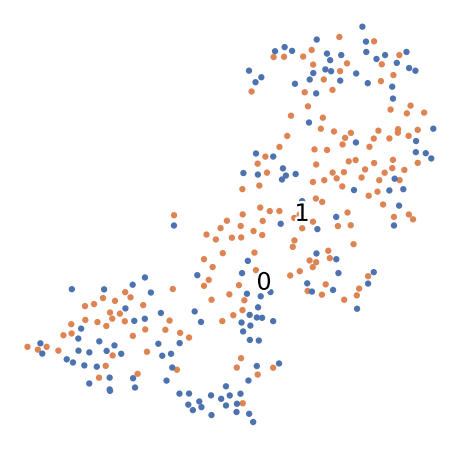

In [23]:
fashion_scatter(df_tsne, df.target)

In [24]:
# Feature Engineering

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [25]:
cols = df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
print('# rows in dataset {0}'.format(len(df)))
print('===============================')

for col in cols:
    print('# rows in {1} with ZERO value: {0}'.format(len(df.loc[df[col]== 0]), col))

# rows in dataset 303
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 96
# rows in cp with ZERO value: 143
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 258
# rows in restecg with ZERO value: 147
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 204
# rows in oldpeak with ZERO value: 99
# rows in slope with ZERO value: 21
# rows in ca with ZERO value: 175
# rows in thal with ZERO value: 2
# rows in target with ZERO value: 138


In [27]:
X= df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.10, random_state = 10)

print('Training Set :', len(X_train))
print('Test Set :', len(X_test))
print('Training Labels :', len(y_train))
print('Test Labels :', len(y_test))



Training Set : 272
Test Set : 31
Training Labels : 272
Test Labels : 31


In [28]:
from sklearn.impute import SimpleImputer
# impute with mean all 0 readings

fill = SimpleImputer(missing_values = 0, strategy = 'mean')

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)
X_test

array([[5.60000000e+01, 1.00000000e+00, 1.87500000e+00, 1.34000000e+02,
        4.09000000e+02, 1.00000000e+00, 1.00000000e+00, 1.50000000e+02,
        1.00000000e+00, 1.90000000e+00, 1.00000000e+00, 2.00000000e+00,
        3.00000000e+00],
       [5.80000000e+01, 1.00000000e+00, 2.00000000e+00, 1.12000000e+02,
        2.30000000e+02, 1.00000000e+00, 1.00000000e+00, 1.65000000e+02,
        1.00000000e+00, 2.50000000e+00, 1.00000000e+00, 1.00000000e+00,
        3.00000000e+00],
       [6.40000000e+01, 1.00000000e+00, 2.00000000e+00, 1.25000000e+02,
        3.09000000e+02, 1.00000000e+00, 1.00000000e+00, 1.31000000e+02,
        1.00000000e+00, 1.80000000e+00, 1.00000000e+00, 2.00000000e+00,
        3.00000000e+00],
       [4.70000000e+01, 1.00000000e+00, 1.87500000e+00, 1.12000000e+02,
        2.04000000e+02, 1.00000000e+00, 1.00000000e+00, 1.43000000e+02,
        1.00000000e+00, 1.00000000e-01, 2.00000000e+00, 2.00000000e+00,
        2.00000000e+00],
       [5.00000000e+01, 1.00000000e+

In [29]:
#  Model  Building and Evaluation

def FitModel(X_train, y_train, X_test, y_test, algo_name, algorithm, gridSearchParams, cv):
    np.random.seed(10)
    
    
    grid=GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    grid_result = grid.fit(X_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm=confusion_matrix(y_test, pred)
    
    print(pred)
    with open(algo_name + '.pkl', 'wb') as to_write:
        pickle.dump(grid_result, to_write)
#     pickle.dump(grid_result, open(algo_name, 'wb'))
    
    
    print('Best Params: ', best_params)
    print('Classification Report :' , classification_report(y_test, pred))
    print('Accuracy Score :' , str(accuracy_score(y_test, pred)))
    print('Confusion Matrix : \n', cm)
    

In [30]:
# Logistic Regression

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization penalty space
C = np.logspace(0, 4, 10)

#  Create hyperparameter options
hyperparameters = dict(C=C, penalty= penalty)

FitModel(X_train, y_train, X_test, y_test, 'LogisticRegression', LogisticRegression(), hyperparameters, cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.3s


[0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'C': 1.0, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        13

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

Accuracy Score : 0.9354838709677419
Confusion Matrix : 
 [[17  1]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.5s finished
/Users/Lina/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# XGBoost

param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2,3,4,5,6,7],
    'learning_rate': np.arange(0.01, 0.1, 0.01).tolist()
}


FitModel(X_train, y_train, X_test, y_test, 'XGBoost', XGBClassifier(), param, cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 454 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1254 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  4.7min finished


[0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.92      0.85      0.88        13

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31

Accuracy Score : 0.9032258064516129
Confusion Matrix : 
 [[17  1]
 [ 2 11]]


In [32]:
#  Random Forest

param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2,3,4,5,6,7]
}


FitModel(X_train, y_train, X_test, y_test, 'Random Forest', RandomForestClassifier() , param, cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.6min finished


[0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'max_depth': 5, 'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        13

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

Accuracy Score : 0.9354838709677419
Confusion Matrix : 
 [[17  1]
 [ 1 12]]


In [33]:
# SVC

param = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

FitModel(X_train, y_train, X_test, y_test, 'SVC', SVC(), param, cv=5)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:    1.7s remaining:    0.1s


[1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'C': 1000, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.75      0.92      0.83        13

    accuracy                           0.84        31
   macro avg       0.84      0.85      0.84        31
weighted avg       0.86      0.84      0.84        31

Accuracy Score : 0.8387096774193549
Confusion Matrix : 
 [[14  4]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.8s finished


In [34]:
# Correcting the Mistake

print('# rows in dataset {0}'.format(len(df)))
print('===============================')

for col in cols:
    print('# rows in {1} with ZERO value: {0}'.format(len(df.loc[df[col]== 0]), col))

# rows in dataset 303
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 96
# rows in cp with ZERO value: 143
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 258
# rows in restecg with ZERO value: 147
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 204
# rows in oldpeak with ZERO value: 99
# rows in slope with ZERO value: 21
# rows in ca with ZERO value: 175
# rows in thal with ZERO value: 2
# rows in target with ZERO value: 138


In [35]:
final_cols = cols
final_cols = list(final_cols)
final_cols.remove('sex')
final_cols.remove('target')
final_cols.remove('age')
final_cols

['cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [36]:
X= df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.10, random_state = 10)

print('Training Set :', len(X_train))
print('Test Set :', len(X_test))
print('Training Labels :', len(y_train))
print('Test Labels :', len(y_test))


Training Set : 272
Test Set : 31
Training Labels : 272
Test Labels : 31


In [37]:
from sklearn.impute import SimpleImputer
# impute with mean all 0 readings

fill = SimpleImputer(missing_values = 0, strategy = 'mean')

X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.fit_transform(X_test[final_cols])
X_test

array([[1.87500000e+00, 1.34000000e+02, 4.09000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.50000000e+02, 1.00000000e+00, 1.90000000e+00,
        1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [2.00000000e+00, 1.12000000e+02, 2.30000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.65000000e+02, 1.00000000e+00, 2.50000000e+00,
        1.00000000e+00, 1.00000000e+00, 3.00000000e+00],
       [2.00000000e+00, 1.25000000e+02, 3.09000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.31000000e+02, 1.00000000e+00, 1.80000000e+00,
        1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [1.87500000e+00, 1.12000000e+02, 2.04000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.43000000e+02, 1.00000000e+00, 1.00000000e-01,
        2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [1.87500000e+00, 1.50000000e+02, 2.43000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.28000000e+02, 1.00000000e+00, 2.60000000e+00,
        1.00000000e+00, 2.00000000e+00, 3.00000000e+

In [38]:
# refitting the model

# Random Forest

param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2,3,4,5,6,7]
}


FitModel(X_train, y_train, X_test, y_test, 'Random Forest', RandomForestClassifier() , param, cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.9min finished


[0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'max_depth': 3, 'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.92      0.85      0.88        13

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31

Accuracy Score : 0.9032258064516129
Confusion Matrix : 
 [[17  1]
 [ 2 11]]


In [39]:
# SVC

param = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

FitModel(X_train, y_train, X_test, y_test, 'SVC', SVC(), param, cv=5)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    0.9s


[1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1]
Best Params:  {'C': 100, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.56      0.69        18
           1       0.60      0.92      0.73        13

    accuracy                           0.71        31
   macro avg       0.75      0.74      0.71        31
weighted avg       0.78      0.71      0.71        31

Accuracy Score : 0.7096774193548387
Confusion Matrix : 
 [[10  8]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.1s finished


In [40]:
# Logistic Regression

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization penalty space
C = np.logspace(0, 4, 10)

#  Create hyperparameter options
hyperparameters = dict(C=C, penalty= penalty)

FitModel(X_train, y_train, X_test, y_test, 'LogisticRegression', LogisticRegression(), hyperparameters, cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.6s


[0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'C': 2.7825594022071245, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        13

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

Accuracy Score : 0.9354838709677419
Confusion Matrix : 
 [[17  1]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
/Users/Lina/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# XGBoost

param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2,3,4,5,6,7],
    'learning_rate': np.arange(0.01, 0.1, 0.01).tolist()
}


FitModel(X_train, y_train, X_test, y_test, 'XGBoost', XGBClassifier(), param, cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1262 tasks      | elapsed:  4.2min


[0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.92      0.85      0.88        13

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31

Accuracy Score : 0.9032258064516129
Confusion Matrix : 
 [[17  1]
 [ 2 11]]


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  4.5min finished


In [42]:
# Balancing the Dataset

X = df.drop('target', axis = 1)
y = df.target
y.value_counts()



1    165
0    138
Name: target, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
print('The scikit-learn version is {}.'.format(sklearn.__version__))

macOS-10.15.5-x86_64-i386-64bit
Python 3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 17:21:09) 
[Clang 9.0.1 ]
NumPy 1.18.5
SciPy 1.4.1
Scikit-Learn 0.23.1
The scikit-learn version is 0.23.1.


In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_OS, Y_res_OS = sm.fit_resample(X,y)
pd.Series(Y_res_OS).value_counts()


1    165
0    165
Name: target, dtype: int64

In [49]:
print(cols)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [50]:
X_res_OS = pd.DataFrame(X_res_OS, columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
Y_res_OS = pd.DataFrame(Y_res_OS, columns = ['target'])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_res_OS, Y_res_OS, test_size=0.1, random_state = 10)

print('Training Set :', len(X_train))
print('Test Set :', len(X_test))
print('Training Labels :', len(y_train))
print('Test Labels :', len(y_test))



Training Set : 297
Test Set : 33
Training Labels : 297
Test Labels : 33


In [52]:
print(final_cols)
type(X_train)

['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


pandas.core.frame.DataFrame

In [54]:
from sklearn.impute import SimpleImputer
# impute with mean all 0 readings

fill = SimpleImputer(missing_values = 0, strategy = 'mean')


X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.fit_transform(X_test[final_cols])
X_test

array([[2.00000000e+00, 1.20000000e+02, 2.26000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.69000000e+02, 1.00000000e+00, 1.45163610e+00,
        2.00000000e+00, 1.70000000e+00, 2.00000000e+00],
       [3.00000000e+00, 1.50000000e+02, 2.40000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.71000000e+02, 1.00000000e+00, 9.00000000e-01,
        2.00000000e+00, 1.70000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.38000000e+02, 2.20000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.52000000e+02, 1.00000000e+00, 1.45163610e+00,
        1.00000000e+00, 1.70000000e+00, 2.00000000e+00],
       [1.94444444e+00, 1.20000000e+02, 2.42000000e+02, 1.00000000e+00,
        1.00000000e+00, 8.60000000e+01, 1.00000000e+00, 1.73750020e+00,
        1.41379310e+00, 1.70000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.20000000e+02, 2.11000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.15000000e+02, 1.00000000e+00, 1.50000000e+00,
        1.00000000e+00, 1.70000000e+00, 2.00000000e+

In [55]:
# Refitting the Model

# Random Forest

param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2,3,4,5,6,7]
}


FitModel(X_train, y_train, X_test, y_test, 'Random Forest', RandomForestClassifier() , param, cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.7min finished
/Users/Lina/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1]
Best Params:  {'max_depth': 5, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.90      0.90      0.90        20

    accuracy                           0.88        33
   macro avg       0.87      0.87      0.87        33
weighted avg       0.88      0.88      0.88        33

Accuracy Score : 0.8787878787878788
Confusion Matrix : 
 [[11  2]
 [ 2 18]]


In [56]:
# SVC

param = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

FitModel(X_train, y_train, X_test, y_test, 'SVC', SVC(), param, cv=5)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    0.8s


[1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1]
Best Params:  {'C': 1000, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.93      0.65      0.76        20

    accuracy                           0.76        33
   macro avg       0.78      0.79      0.76        33
weighted avg       0.81      0.76      0.76        33

Accuracy Score : 0.7575757575757576
Confusion Matrix : 
 [[12  1]
 [ 7 13]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.0s finished
/Users/Lina/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
